In [24]:
import re
import os 
from glob import glob
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy import integrate
from scipy import interpolate
from scipy.signal import find_peaks
from scipy.interpolate import interp1d
from scipy.signal import savgol_filter

# Data cleaning, all in SI units

   #Drive Voltage    E_SI  Measured Polarization      P_SI  Point  Time (ms)  \
0         -4.5776 -4.5776              -0.889348 -0.008893    1.0       0.05   
1         -6.1798 -6.1798              -0.887338 -0.008873    2.0       0.10   
2          0.4578  0.4578              -0.882480 -0.008825    3.0       0.15   
3         -0.9155 -0.9155              -0.876449 -0.008764    4.0       0.20   
4          0.4578  0.4578              -0.869748 -0.008697    5.0       0.25   

   Voltage Integration  P from R  Corrected P  
0             0.000000  0.000000    -0.889348  
1            -0.268935 -0.000043    -0.887295  
2            -0.411985 -0.000067    -0.882413  
3            -0.423428 -0.000068    -0.876381  
4            -0.434870 -0.000070    -0.869678  
#--------------------------below is after interting columns of P_SI AND E_SI0---------------------------------------#
   #Drive Voltage  Measured Polarization  Point  Time (ms)  \
0         -4.5776              -0.889348    1.0    

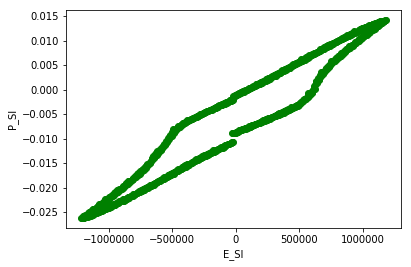

In [7]:
path = 'C:\\PhD-Zipeng\\Research projects\\PUND\\BF4 PUND PE Heating\\PECorrected'
output_path = 'C:\\PhD-Zipeng\\Research projects\\DABCO\\BF4\\No16_2x42mm2_250um\\PUND indirect\\PE'


df = pd.read_csv(r'C:\\PhD-Zipeng\\Research projects\\PUND\\BF4 PUND PE Heating\\PECorrected\\377.08.csv',encoding= 'unicode_escape')
print(df.head(5))
#删除以前的错误 P_Si 和 E_SI 列，避免混乱
df.drop(['P_SI'],axis=1,inplace=True)
df.drop(['E_SI'],axis=1,inplace=True)
# print(df.head(5))

# convert P into C/m^2
# convert E into V/m
thickness = 250 # unit in micro-metre

P_SI  = df['Corrected P']*0.01
E_SI  = df['#Drive Voltage']/(thickness*0.000001)

df.insert(len(df.columns), "E_SI", E_SI)
df.insert(len(df.columns), "P_SI", P_SI)

print('#--------------------------below is after interting columns of P_SI AND E_SI0---------------------------------------#')
print(df.head(5))
print('#-------------------------------------------------------------------------------------------------------------------#')
plt.plot(df['E_SI'],df['P_SI'],'go--')
plt.xlabel('E_SI')
plt.ylabel('P_SI')
plt.show()

In [86]:
## 批量操作所有文件

path = 'C:\\PhD-Zipeng\\Research projects\\PUND\\BF4 PUND PE Heating\\PECorrected'
output_path = 'C:\\PhD-Zipeng\\Research projects\\DABCO\\BF4\\No16_2x42mm2_250um\\PUND indirect\\Raw data_SI units'
files = glob(path + "/*.csv")
thickness = 250 # unit in micro-metre
i = 0

for file in files:
    df = pd.read_csv(file,delimiter='\,')
    df.drop(['P_SI'],axis=1,inplace=True)
    df.drop(['E_SI'],axis=1,inplace=True)

    P_SI  = df['Corrected P']*0.01
    E_SI  = df['#Drive Voltage']/(thickness*0.000001)

    df.insert(len(df.columns), "E_SI", E_SI)
    df.insert(len(df.columns), "P_SI", P_SI)
    
    file_name = output_path +'\\'+ str(temperature[i])+'.csv'
    
    df.to_csv(file_name, index=None)
    i = i+1

C:\Users\Dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


### 如果上面的loop无法运行，用这个cell 来 debug（一般问题是 csv读取格式/ delimiter 用逗号还是空格）
path = 'C:\\PhD-Zipeng\\Research projects\\PUND\\BF4 PUND PE Heating\\PECorrected\\359.93.csv'
output_path = 'C:\\PhD-Zipeng\\Research projects\\DABCO\\BF4\\No16_2x42mm2_250um\\PUND indirect\\Raw data_SI units'
files = glob(path + "/*.csv")
thickness = 250 # unit in micro-metre
df = pd.read_csv(file,delimiter='\,')
df.head(5)

# Resolve PE and find upper-branch

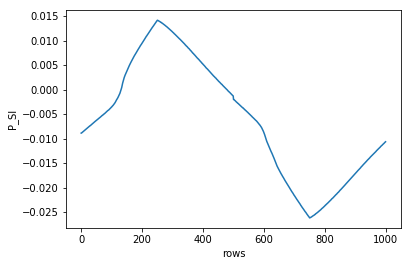

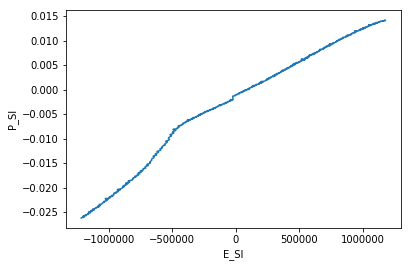

In [59]:
plt.plot(df['P_SI'])
plt.xlabel('rows')
plt.ylabel('P_SI')
plt.show()
index1 = df['P_SI'].idxmax()
index2 = df['P_SI'].idxmin()

###提取特定的行列，构成 P_upper_branch
# P_upper = df[index1:index2]
P_upper = df.loc[index1:index2, [ 'E_SI','P_SI']]
# print(P_upper)
plt.plot(P_upper['E_SI'],P_upper['P_SI'])
plt.xlabel('E_SI')
plt.ylabel('P_SI')
plt.show()

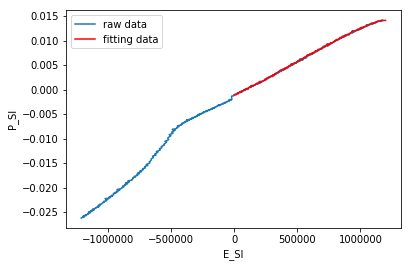

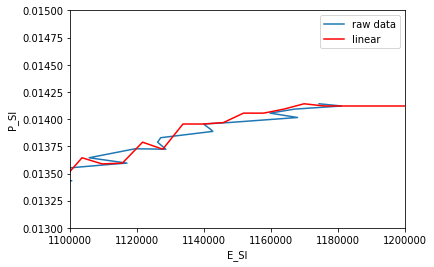

In [61]:
### https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html
### 根据实验数据，插点 得到 P_SI, E_SI。 这一步的目的是为了之后 求 P（T），使得所有的 P（E）数据点对齐
x = P_upper['E_SI']
y = P_upper['P_SI']

## 如果需要 ， 可以smooth data！！！！！

# y = savgol_filter(P_upper['P_SI'], 21, 1)
# plt.plot(x, y)
# plt.show()
         
f = interp1d(x, y, fill_value="extrapolate",kind='next')
xnew = np.linspace(0, 1200000, num=200, endpoint=True)

plot1 = plt.plot(x, y,)
plot2 = plt.plot(xnew, f(xnew), 'r-')
plt.legend(['raw data', 'fitting data'], loc='best')
plt.xlabel('E_SI')
plt.ylabel('P_SI')
plt.show() 


plot1 = plt.plot(x, y,)
plot2 = plt.plot(xnew, f(xnew), 'r-')
plt.legend(['raw data', 'linear'], loc='best')
plt.axis([1100000,1200000,0.013,0.015])
plt.xlabel('E_SI')
plt.ylabel('P_SI')
plt.show() 

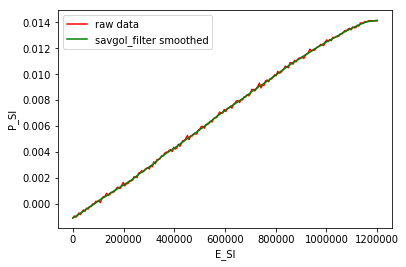

Length of data raws =  200


,E_SI,P_SI,P_smooth
0,0.000000,-0.001082,-0.001085
1,6030.150754,-0.000940,-0.001011
2,12060.301508,-0.001019,-0.000936
3,18090.452261,-0.000901,-0.000861
4,24120.603015,-0.000698,-0.000786


In [62]:
### PE的数据可能需要 smooth，所有插入一列
P_upper_fitting = pd.DataFrame()
P_upper_fitting.insert(len(P_upper_fitting.columns), "E_SI", xnew)
P_upper_fitting.insert(len(P_upper_fitting.columns), "P_SI", f(xnew))

P_smooth = savgol_filter(P_upper_fitting["P_SI"], 11, 1)
P_upper_fitting.insert(len(P_upper_fitting.columns), "P_smooth", P_smooth)

plt.plot(P_upper_fitting["E_SI"], P_upper_fitting["P_SI"], 'r-')
plt.plot(P_upper_fitting["E_SI"], P_upper_fitting["P_smooth"], 'g')
plt.xlabel('E_SI')
plt.ylabel('P_SI')
plt.legend(['raw data', 'savgol_filter smoothed'], loc='best')
plt.show()
print('Length of data raws = ',len(P_upper_fitting))
P_upper_fitting.head(5)

#为上一栏调试 smooth 的参数： window size 51, polynomial order 3

x = P_upper_fitting["E_SI"]
y = P_upper_fitting["P_SI"]
yhat = savgol_filter(y, 11, 1) # window size 51, polynomial order 3
print(len(yhat))
plt.plot(x,y)
plt.plot(x,yhat, color='red')
plt.axis([1100000,1200000,0.013,0.015])
plt.show()

# Convert P(E) to P(T)

In [63]:
### 不同 T 的 PE loops 排成一个大矩阵
print(type(P_upper_fitting))

<class 'pandas.core.frame.DataFrame'>


In [109]:
#从文件名提取温度with regular expression
# path = 'C:\\PhD-Zipeng\\Research projects\\PUND\\BF4 PUND PE Heating\\PECorrected\\Try'
path = 'C:\\PhD-Zipeng\\Research projects\\PUND\\BF4 PUND PE Heating\\PECorrected'
files = os.listdir(path)
temperature = list()
for file in files:
    if file.endswith(".csv"):
        num = re.findall(r"\d+.\d+", file)
        temperature.append(float(num[0]))
print(temperature)

[359.93, 360.05, 360.41, 360.8, 361.17, 361.4, 361.72, 362.03, 362.38, 362.65, 363.04, 363.37, 363.62, 363.96, 364.16, 364.54, 364.75, 364.92, 365.18, 365.41, 365.69, 365.92, 366.19, 366.35, 366.65, 366.91, 367.12, 367.4, 367.63, 367.89, 368.17, 368.4, 368.64, 368.88, 369.1, 369.37, 369.61, 369.91, 370.14, 370.39, 370.58, 370.89, 371.11, 371.37, 371.62, 371.83, 372.08, 372.33, 372.6, 372.82, 373.06, 373.35, 373.53, 373.79, 374.06, 374.3, 374.57, 374.79, 375.07, 375.27, 375.55, 375.77, 376.04, 376.31, 376.47, 376.82, 377.08, 377.25, 377.52, 377.9, 378.06, 378.34, 378.62, 378.88, 379.02, 379.25, 379.64, 379.79, 380.06, 380.29, 380.54, 380.79, 381.0, 381.36, 381.54, 381.84, 381.99, 382.38, 382.46, 382.79, 383.06, 383.32, 383.51, 383.8, 384.01, 384.35, 384.43, 384.8, 384.98, 385.23, 385.44, 385.74, 385.99, 386.22, 386.5, 386.64, 386.96, 387.2, 387.53, 387.73, 387.89, 388.26, 388.44, 388.7, 388.92, 389.22, 389.4, 389.61, 389.96, 390.13, 390.43, 390.63, 390.88, 391.16, 391.39, 391.69, 391.87

In [116]:
# path = 'C:\\PhD-Zipeng\\Research projects\\PUND\\BF4 PUND PE Heating\\PECorrected\\Try'
path = 'C:\\PhD-Zipeng\\Research projects\\PUND\\BF4 PUND PE Heating\\PECorrected'
output_path = 'C:\\PhD-Zipeng\\Research projects\\DABCO\\BF4\\No16_2x42mm2_250um\\PUND indirect\\PE matrix'
files = glob(path + "/*.csv")

P_upper_fitting = pd.DataFrame()
E = np.linspace(0, 1200000, num=240, endpoint=True)
P_upper_fitting.insert(len(P_upper_fitting.columns), "E_SI", E)

i= 0
for file in files:
    df = pd.read_csv(file,delimiter='\,')
    index1 = df['P_SI'].idxmax()
    index2 = df['P_SI'].idxmin()
    x = P_upper['E_SI']
    y = P_upper['P_SI']
    P_upper = df.loc[index1:index2, [ 'E_SI','P_SI']]
    f = interp1d(x, y, fill_value="extrapolate",kind='next')
    
    column_name = str(temperature[i])
    P_upper_fitting.insert(len(P_upper_fitting.columns), column_name, f(E))
    i = i+1
    
print(P_upper_fitting.shape)
# print(P_upper_fitting.head(5))

P_upper_fitting.to_csv(output_path+'.csv', index=None)

C:\Users\Dev\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if sys.path[0] == '':


(240, 141)


In [117]:
P_upper_fitting.head(5)

,E_SI,359.93,360.05,360.41,360.8,361.17,361.4,361.72,362.03,362.38,...,392.9,393.15,393.39,393.67,393.9,394.12,394.37,394.64,394.88,395.08
0,0.000000,0.000580,0.021920,0.021308,0.021951,0.021890,0.021811,0.021753,0.021794,0.021919,...,-0.000153,0.000113,-0.000057,-0.000043,0.000218,0.000359,0.000070,0.000215,0.000153,0.000177
1,5020.920502,0.012918,0.033263,0.033919,0.033325,0.033675,0.033822,0.033901,0.033865,0.033955,...,0.013491,0.013722,0.013514,0.013659,0.013621,0.013473,0.013644,0.013146,0.013526,0.013278
2,10041.841004,0.012918,0.033263,0.033919,0.033325,0.033675,0.033822,0.033901,0.033865,0.033955,...,0.013491,0.013722,0.013514,0.013659,0.013621,0.013473,0.013644,0.013146,0.013526,0.013278
3,15062.761506,0.012918,0.033263,0.033919,0.033325,0.033675,0.033822,0.033901,0.033865,0.033955,...,0.013491,0.013722,0.013514,0.013659,0.013621,0.013473,0.013644,0.013146,0.013526,0.013278
4,20083.682008,0.012918,0.033263,0.033919,0.033325,0.033675,0.033822,0.033901,0.033865,0.033955,...,0.013491,0.013722,0.013514,0.013659,0.013621,0.013473,0.013644,0.013146,0.013526,0.013278


In [125]:
P_T = P_upper_fitting.transpose()
P_T.head(5)
# P_T.to_csv('C:\\PhD-Zipeng\\Research projects\\DABCO\\BF4\\No16_2x42mm2_250um\\PUND indirect\\PT matrix'+'.csv')

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
E_SI,0.000000,5020.920502,10041.841004,15062.761506,20083.682008,25104.602510,30125.523013,35146.443515,40167.364017,45188.284519,...,1.154812e+06,1.159833e+06,1.164854e+06,1.169874e+06,1.174895e+06,1.179916e+06,1.184937e+06,1.189958e+06,1.194979e+06,1.200000e+06
359.93,0.000580,0.012918,0.012918,0.012918,0.012918,0.012918,0.012918,0.012918,0.012918,0.012918,...,1.291825e-02,1.291825e-02,1.291825e-02,1.291825e-02,1.291825e-02,1.291825e-02,1.291825e-02,1.291825e-02,1.291825e-02,1.291825e-02
360.05,0.021920,0.033263,0.033263,0.033263,0.033263,0.033263,0.033263,0.033263,0.033263,0.033263,...,3.326302e-02,3.326302e-02,3.326302e-02,3.326302e-02,3.326302e-02,3.326302e-02,3.326302e-02,3.326302e-02,3.326302e-02,3.326302e-02
360.41,0.021308,0.033919,0.033919,0.033919,0.033919,0.033919,0.033919,0.033919,0.033919,0.033919,...,3.391885e-02,3.391885e-02,3.391885e-02,3.391885e-02,3.391885e-02,3.391885e-02,3.391885e-02,3.391885e-02,3.391885e-02,3.391885e-02
360.8,0.021951,0.033325,0.033325,0.033325,0.033325,0.033325,0.033325,0.033325,0.033325,0.033325,...,3.332500e-02,3.332500e-02,3.332500e-02,3.332500e-02,3.332500e-02,3.332500e-02,3.332500e-02,3.332500e-02,3.332500e-02,3.332500e-02
